<a href="https://colab.research.google.com/github/vaishnavisharma6/Solar-still-design-analysis/blob/main/Solar_still_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import io
%config InlineBackend.figure_format = 'svg'

In [ ]:
url = 'https://github.com/vaishnavisharma6/Solar-still-design-analysis/raw/main/DATA.csv'
df = pd.read_csv(url)
data = shuffle(df)
print(data)

    Evaporative Water temperature\n(0C )  Glass cover temperature (0C)  \
11                               22.0000                       18.2748   
57                               57.9542                       54.2587   
56                               44.1083                       40.4285   
18                               49.3921                       45.6725   
21                               24.0000                       20.3010   
..                                   ...                           ...   
38                               65.1111                       61.3943   
53                               22.6508                       18.9930   
81                               70.3267                       66.5766   
55                               28.4892                       24.8174   
6                                53.0181                       49.2750   

    Ambient temperature (0C)  Solar intensity (kw/ m2)  Month Number  \
11                      19.0           

In [ ]:
N = data.shape[0]
Ntrain = 101
Nvalid = 15
Ntest = N - Ntrain - Nvalid

In [ ]:
data = data.to_numpy()
Xtrain = data[0:Ntrain, 0:5]
Ytrain = data[0:Ntrain, 5]
Xvalid = data[Ntrain: Ntrain+Nvalid, 0:5]
Yvalid = data[Ntrain: Ntrain+Nvalid, 5]
Xtest = data[Ntrain+Nvalid:-1, 0:5]
Ytest = data[Ntrain+Nvalid: -1, 5]

AttributeError: ignored

In [ ]:
class Trainingplot(tf.keras.callbacks.Callback):
  def on_train_begin(self, logs = {}):
    self.losses = []
    self.val_losses = []
    self.logs = []
  def on_epoch_end(self, epoch, logs = {}):
    self.logs.append(logs)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))  

    if epoch >1 and epoch%500 == 0:                                                             #callback function
       clear_output(wait = True)
       N = np.arange(0, len(self.losses))  

       plt.figure()
       plt.semilogy(N, self.losses, label = 'Train_loss')
       plt.semilogy(N, self.val_losses, label = 'Validation loss')
       plt.title('After epoch = {}'.format(epoch))
       plt.xlabel('Epoch #')
       plt.ylabel('Loss')
       plt.legend()
       plt.show()
      


In [ ]:
model = Sequential()
model.add(Dense(512, input_shape = (5,), activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               3072      
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 79,105
Trainable params: 79,105
Non-trainable params: 0
_________________________________________________________________


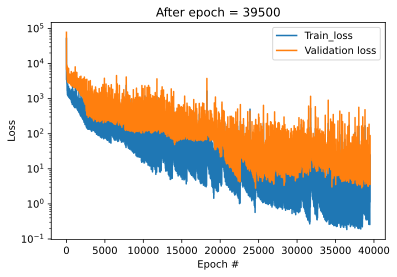

In [ ]:
plot_losses = Trainingplot()
model.fit(Xtrain, Ytrain, epochs = 40000, verbose = 0, batch_size = 32, shuffle = True, validation_data = (Xvalid, Yvalid), callbacks = [plot_losses])

4/4 [==============================] - 0s 3ms/step - loss: 0.3356 - mse: 0.3356
Train accuracy: 0.33560043573379517
1/1 [==============================] - 0s 19ms/step - loss: 4.9094 - mse: 4.9094
Validation accuracy: 4.909382343292236
1/1 [==============================] - 0s 18ms/step - loss: 2.1585 - mse: 2.1585
Test error: 2.1585114002227783
1/1 [==============================] - 0s 16ms/step


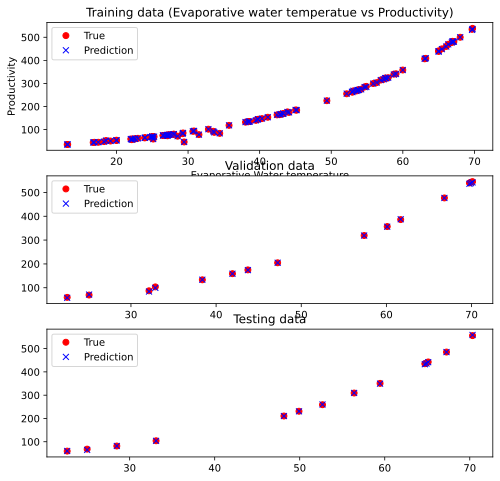

In [ ]:
train_loss, train_mse = model.evaluate(Xtrain, Ytrain)
print('Train accuracy:', train_mse)
valid_loss, valid_mse = model.evaluate(Xvalid, Yvalid)
print('Validation accuracy:', valid_mse)
test_loss, test_mse = model.evaluate(Xtest, Ytest)
print('Test error:', test_mse)

plt.figure(figsize=(8,8))
plt.subplot(3,1,1)
plt.plot(Xtrain[:,0],Ytrain,'o',color='red',label='True')
plt.plot(Xtrain[:,0],model.predict(Xtrain),'x',color='blue',label='Prediction')
plt.title('Training data (Evaporative water temperatue vs Productivity)')
plt.xlabel('Evaporative Water temperature')
plt.ylabel('Productivity')
plt.legend()

plt.subplot(3,1,2)
plt.plot(Xvalid[:,0],Yvalid,'o',color='red',label='True')
plt.plot(Xvalid[:,0],model.predict(Xvalid),'x',color='blue',label='Prediction')
plt.title('Validation data')
plt.legend()

plt.subplot(3,1,3)
plt.plot(Xtest[:,0],Ytest,'o',color='red',label='True')
plt.plot(Xtest[:,0],model.predict(Xtest),'x',color='blue',label='Prediction')
plt.title('Testing data')
plt.legend()

plt.show()


4/4 [==============================] - 0s 3ms/step - loss: 0.3356 - mse: 0.3356
Train accuracy: 0.33560043573379517
1/1 [==============================] - 0s 18ms/step - loss: 4.9094 - mse: 4.9094
Validation accuracy: 4.909382343292236
1/1 [==============================] - 0s 16ms/step - loss: 2.1585 - mse: 2.1585
Test error: 2.1585114002227783
1/1 [==============================] - 0s 18ms/step


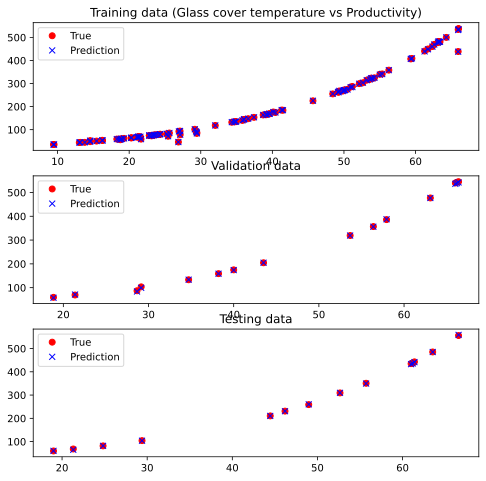

In [ ]:
train_loss, train_mse = model.evaluate(Xtrain, Ytrain)
print('Train accuracy:', train_mse)
valid_loss, valid_mse = model.evaluate(Xvalid, Yvalid)
print('Validation accuracy:', valid_mse)
test_loss, test_mse = model.evaluate(Xtest, Ytest)
print('Test error:', test_mse)

plt.figure(figsize=(8,8))
plt.subplot(3,1,1)
plt.plot(Xtrain[:,1],Ytrain,'o',color='red',label='True')
plt.plot(Xtrain[:,1],model.predict(Xtrain),'x',color='blue',label='Prediction')
plt.title('Training data (Glass cover temperature vs Productivity)')
plt.legend()

plt.subplot(3,1,2)
plt.plot(Xvalid[:,1],Yvalid,'o',color='red',label='True')
plt.plot(Xvalid[:,1],model.predict(Xvalid),'x',color='blue',label='Prediction')
plt.title('Validation data')
plt.legend()

plt.subplot(3,1,3)
plt.plot(Xtest[:,1],Ytest,'o',color='red',label='True')
plt.plot(Xtest[:,1],model.predict(Xtest),'x',color='blue',label='Prediction')
plt.title('Testing data')
plt.legend()

plt.show()


4/4 [==============================] - 0s 3ms/step - loss: 0.3356 - mse: 0.3356
Train accuracy: 0.33560043573379517
1/1 [==============================] - 0s 24ms/step - loss: 4.9094 - mse: 4.9094
Validation accuracy: 4.909382343292236
1/1 [==============================] - 0s 22ms/step - loss: 2.1585 - mse: 2.1585
Test error: 2.1585114002227783
1/1 [==============================] - 0s 79ms/step


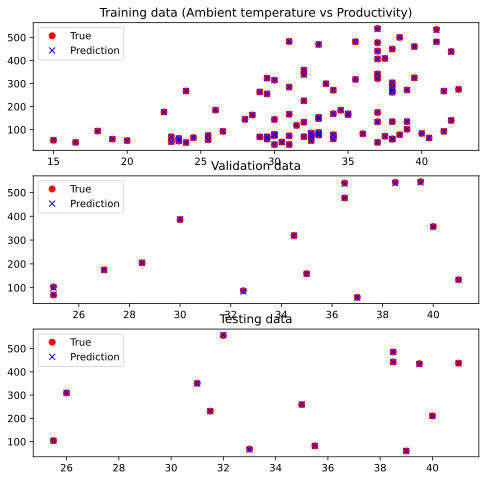

In [ ]:
train_loss, train_mse = model.evaluate(Xtrain, Ytrain)
print('Train accuracy:', train_mse)
valid_loss, valid_mse = model.evaluate(Xvalid, Yvalid)
print('Validation accuracy:', valid_mse)
test_loss, test_mse = model.evaluate(Xtest, Ytest)
print('Test error:', test_mse)

plt.figure(figsize=(8,8))
plt.subplot(3,1,1)
plt.plot(Xtrain[:,2],Ytrain,'o',color='red',label='True')
plt.plot(Xtrain[:,2],model.predict(Xtrain),'x',color='blue',label='Prediction')
plt.title('Training data (Ambient temperature vs Productivity)')
plt.legend()

plt.subplot(3,1,2)
plt.plot(Xvalid[:,2],Yvalid,'o',color='red',label='True')
plt.plot(Xvalid[:,2],model.predict(Xvalid),'x',color='blue',label='Prediction')
plt.title('Validation data')
plt.legend()

plt.subplot(3,1,3)
plt.plot(Xtest[:,2],Ytest,'o',color='red',label='True')
plt.plot(Xtest[:,2],model.predict(Xtest),'x',color='blue',label='Prediction')
plt.title('Testing data')
plt.legend()

plt.show()


4/4 [==============================] - 0s 2ms/step - loss: 0.3356 - mse: 0.3356
Train accuracy: 0.33560043573379517
1/1 [==============================] - 0s 18ms/step - loss: 4.9094 - mse: 4.9094
Validation accuracy: 4.909382343292236
1/1 [==============================] - 0s 18ms/step - loss: 2.1585 - mse: 2.1585
Test error: 2.1585114002227783
1/1 [==============================] - 0s 15ms/step


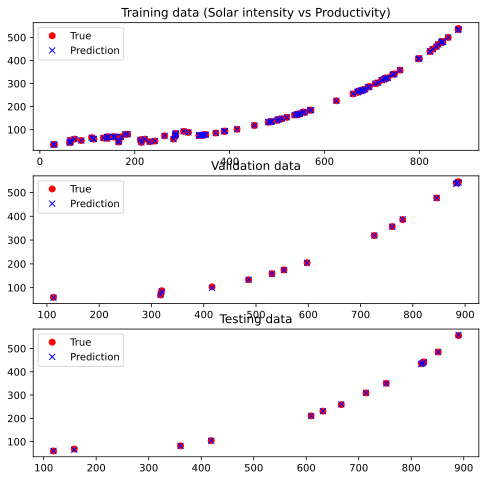

In [ ]:
train_loss, train_mse = model.evaluate(Xtrain, Ytrain)
print('Train accuracy:', train_mse)
valid_loss, valid_mse = model.evaluate(Xvalid, Yvalid)
print('Validation accuracy:', valid_mse)
test_loss, test_mse = model.evaluate(Xtest, Ytest)
print('Test error:', test_mse)

plt.figure(figsize=(8,8))
plt.subplot(3,1,1)
plt.plot(Xtrain[:,3],Ytrain,'o',color='red',label='True')
plt.plot(Xtrain[:,3],model.predict(Xtrain),'x',color='blue',label='Prediction')
plt.title('Training data (Solar intensity vs Productivity)')
plt.legend()

plt.subplot(3,1,2)
plt.plot(Xvalid[:,3],Yvalid,'o',color='red',label='True')
plt.plot(Xvalid[:,3],model.predict(Xvalid),'x',color='blue',label='Prediction')
plt.title('Validation data')
plt.legend()

plt.subplot(3,1,3)
plt.plot(Xtest[:,3],Ytest,'o',color='red',label='True')
plt.plot(Xtest[:,3],model.predict(Xtest),'x',color='blue',label='Prediction')
plt.title('Testing data')
plt.legend()

plt.show()


4/4 [==============================] - 0s 3ms/step - loss: 0.3356 - mse: 0.3356
Train accuracy: 0.33560043573379517
1/1 [==============================] - 0s 20ms/step - loss: 4.9094 - mse: 4.9094
Validation accuracy: 4.909382343292236
1/1 [==============================] - 0s 17ms/step - loss: 2.1585 - mse: 2.1585
Test error: 2.1585114002227783
1/1 [==============================] - 0s 18ms/step


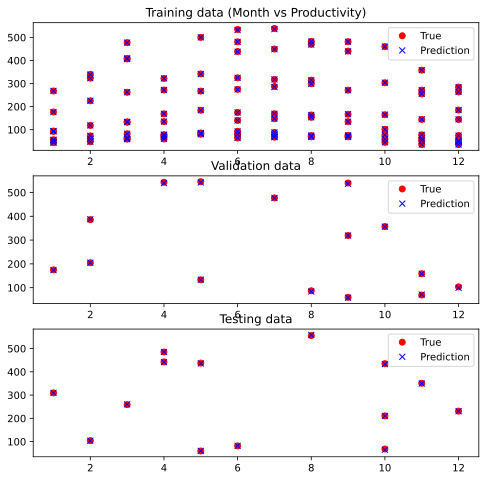

In [ ]:
train_loss, train_mse = model.evaluate(Xtrain, Ytrain)
print('Train accuracy:', train_mse)
valid_loss, valid_mse = model.evaluate(Xvalid, Yvalid)
print('Validation accuracy:', valid_mse)
test_loss, test_mse = model.evaluate(Xtest, Ytest)
print('Test error:', test_mse)

plt.figure(figsize=(8,8))
plt.subplot(3,1,1)
plt.plot(Xtrain[:,4],Ytrain,'o',color='red',label='True')
plt.plot(Xtrain[:,4],model.predict(Xtrain),'x',color='blue',label='Prediction')
plt.title('Training data (Month vs Productivity)')
plt.legend()

plt.subplot(3,1,2)
plt.plot(Xvalid[:,4],Yvalid,'o',color='red',label='True')
plt.plot(Xvalid[:,4],model.predict(Xvalid),'x',color='blue',label='Prediction')
plt.title('Validation data')
plt.legend()

plt.subplot(3,1,3)
plt.plot(Xtest[:,4],Ytest,'o',color='red',label='True')
plt.plot(Xtest[:,4],model.predict(Xtest),'x',color='blue',label='Prediction')
plt.title('Testing data')
plt.legend()

plt.show()
